In [1]:
import sys
import os

sys.path.append("../..")

from transformers import T5Tokenizer
from src.datamodules import IEGenericDataset, IEGenericOutputDataset
import src.utils.evaluation_helpers as evaluation_helpers

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style("ticks")
sns.set_palette("deep")


PRE_COMPUTED_DATA_DIR = '../../data/final_pre_computed'
DATA_DIR = "../../data"


tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

def get_dataset_parameters(data_dir, dataset_name, split, constrained_world, linearization_class_id="subject_collapsed", gzipped=False, filter_on_num_tokens=True, apply_ordering_heuristic=False, **kwargs):
    dataset_parameters = {
        'name': dataset_name,
        'constrained_world': constrained_world,
        'constrained_worlds_dir': f"{DATA_DIR}/constrained_worlds",
        'load_dataset_params': {
            "data_dir": os.path.join(data_dir, dataset_name),
            "split": split,
            "filter_on_num_tokens": filter_on_num_tokens,
            "apply_ordering_heuristic": apply_ordering_heuristic,
            "gzipped": gzipped
        },
        "linearization_class_id": linearization_class_id,
        "linearization_class_id_for_filtering": linearization_class_id,
        "seed": 123,
        "max_num_tokens_input": 256,
        "max_num_tokens_target": 256,
    }

    dataset_parameters.update(kwargs)
    return dataset_parameters

def get_dataset(dataset_parameters, tokenizer):
    return IEGenericDataset(**dataset_parameters, tokenizer=tokenizer)

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Concerning Problematic Entity Names

In [2]:
dataset_name2splits = {}
dataset_name2splits["sdg_text_davinci_003"] = ["test_ordered", "test_small_ordered", "val_ordered"]
dataset_name2splits["sdg_code_davinci_002"] = ["train_ordered", "test_ordered", "test_small_ordered", "val_ordered"]
dataset_name2splits["rebel"] = ["train", "test", "test_small", "val"]

verifications = {
  "compute_frequency_dicts": False,
  "count_datapoints_with_unk_in_target": True,
  "verify_triplet_ordering": False
}
gzipped = True

In [3]:
for dataset_name, splits in dataset_name2splits.items():
    for split in splits:
        print(f"{'~' * 30}[{dataset_name}--{split}]{'~' * 30}")
        
        # constrained_world="genie"
        # print(f"{'=' * 10}[{constrained_world}]{'=' * 10}")
        # dataset_parameters = get_dataset_parameters(PRE_COMPUTED_DATA_DIR, dataset_name, split, constrained_world=constrained_world, gzipped=gzipped, **verifications)
        # dataset = get_dataset(dataset_parameters, tokenizer=tokenizer)

        constrained_world="genie_t5_tokenizeable"
        print(f"{'=' * 10}[{constrained_world}]{'=' * 10}")
        dataset_parameters = get_dataset_parameters(PRE_COMPUTED_DATA_DIR, dataset_name, split, constrained_world=constrained_world, gzipped=gzipped, **verifications)
        dataset = get_dataset(dataset_parameters, tokenizer=tokenizer)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_text_davinci_003--test_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [00:02<00:00, 19715.66it/s]

INFO:src.datamodules.ie_generic:Loaded 46601 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 3684 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 46601, 'num_triplets': 159088, 'num_unique_entities': 97505, 'num_unique_relations': 876}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 46601/46601 [00:00<00:00, 428035.00it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_text_davinci_003--test_small_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 21975.41it/s]

INFO:src.datamodules.ie_generic:Loaded 9261 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 739 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9261, 'num_triplets': 31749, 'num_unique_entities': 25844, 'num_unique_relations': 873}



Counting datapoints with <unk> among the target ids...: 100%|██████████| 9261/9261 [00:00<00:00, 438785.08it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_text_davinci_003--val_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 14016.42it/s]

INFO:src.datamodules.ie_generic:Loaded 9271 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 729 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9271, 'num_triplets': 31420, 'num_unique_entities': 25529, 'num_unique_relations': 869}



Counting datapoints with <unk> among the target ids...: 100%|██████████| 9271/9271 [00:00<00:00, 421065.43it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_code_davinci_002--train_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz: 100%|██████████| 1815378/1815378 [04:11<00:00, 7229.82it/s] 

INFO:src.datamodules.ie_generic:Loaded 1678816 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 134289 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 2169 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 104 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 1678816, 'num_triplets': 5551159, 'num_unique_entities': 1676434, 'num_unique_relations': 876}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 1678816/1678816 [00:11<00:00, 140613.39it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_code_davinci_002--test_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [01:12<00:00, 691.68it/s]  

INFO:src.datamodules.ie_generic:Loaded 46507 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 3684 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 94 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 46507, 'num_triplets': 158560, 'num_unique_entities': 97330, 'num_unique_relations': 876}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 46507/46507 [00:00<00:00, 407127.37it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_code_davinci_002--test_small_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 21863.43it/s]

INFO:src.datamodules.ie_generic:Loaded 9243 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 739 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 18 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9243, 'num_triplets': 31645, 'num_unique_entities': 25773, 'num_unique_relations': 873}



Counting datapoints with <unk> among the target ids...: 100%|██████████| 9243/9243 [00:00<00:00, 432296.88it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[sdg_code_davinci_002--val_ordered]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 22444.12it/s]

INFO:src.datamodules.ie_generic:Loaded 9263 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 729 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 8 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9263, 'num_triplets': 31376, 'num_unique_entities': 25501, 'num_unique_relations': 869}



Counting datapoints with <unk> among the target ids...: 100%|██████████| 9263/9263 [00:00<00:00, 430319.63it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[rebel--train]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/train.jsonl.gz: 100%|██████████| 2813210/2813210 [03:30<00:00, 13375.42it/s]

INFO:src.datamodules.ie_generic:Loaded 2102847 datapoints from ../../data/final_pre_computed/rebel/train.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 669327 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 90 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 40946 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 2102847, 'num_triplets': 4995292, 'num_unique_entities': 1562098, 'num_unique_relations': 866}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 2102847/2102847 [00:13<00:00, 153710.95it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[rebel--test]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test.jsonl.gz: 100%|██████████| 156449/156449 [01:25<00:00, 1831.37it/s] 

INFO:src.datamodules.ie_generic:Loaded 116859 datapoints from ../../data/final_pre_computed/rebel/test.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 37367 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 4 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2219 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 116859, 'num_triplets': 277524, 'num_unique_entities': 155396, 'num_unique_relations': 586}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 116859/116859 [00:00<00:00, 427574.36it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[rebel--test_small]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test_small.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 26050.74it/s]

INFO:src.datamodules.ie_generic:Loaded 7433 datapoints from ../../data/final_pre_computed/rebel/test_small.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 2421 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 1 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 145 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 7433, 'num_triplets': 17654, 'num_unique_entities': 14575, 'num_unique_relations': 317}



Counting datapoints with <unk> among the target ids...: 100%|██████████| 7433/7433 [00:00<00:00, 450068.74it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[rebel--val]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
==========[genie_t5_tokenizeable]==========
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/val.jsonl.gz: 100%|██████████| 155926/155926 [00:03<00:00, 39557.59it/s]

INFO:src.datamodules.ie_generic:Loaded 116286 datapoints from ../../data/final_pre_computed/rebel/val.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 37385 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 10 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2245 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 116286, 'num_triplets': 275957, 'num_unique_entities': 154875, 'num_unique_relations': 596}


Counting datapoints with <unk> among the target ids...: 100%|██████████| 116286/116286 [00:00<00:00, 467771.09it/s]

INFO:src.datamodules.ie_generic:Number of datapoints with unk in target: 0


## Concerning the Bucket Plot

In [4]:
bucket_plot_dataset_name2splits = {}
bucket_plot_dataset_name2splits["sdg_text_davinci_003"] = ["test_ordered", "test_small_ordered", "val_ordered"]
bucket_plot_dataset_name2splits["sdg_code_davinci_002"] = ["train_ordered", "test_ordered", "test_small_ordered", "val_ordered"]
bucket_plot_dataset_name2splits["rebel"] = ["test", "test_small", "val"]

def get_plot_data(constrained_world):
  plot_data = {}
  for dataset_name, splits in bucket_plot_dataset_name2splits.items():
      for split in splits:
        dataset_parameters = get_dataset_parameters(PRE_COMPUTED_DATA_DIR, dataset_name, split, constrained_world=constrained_world, gzipped=gzipped, **verifications)
        dataset = get_dataset(dataset_parameters, tokenizer=tokenizer)
        for dp_processed, dp in zip(dataset, dataset.data):
          dp["target_triplets"] = dataset.linearization_class.text_to_triplet_list(IEGenericOutputDataset.get_targets(dp_processed))

        rel_sf2dp_indices = evaluation_helpers._get_rel_sf2dp_indices(dataset.data, False)
        curr_rel = set(rel_sf2dp_indices.keys())
        bucket_idx2dp_indices = evaluation_helpers._get_bucket_idx2dp_indices(rel_sf2dp_indices, bucket_idx2reference_rels_sfs)

        curr_bucket_idx2freq = {bucket_idx: len(dp_indices) for bucket_idx, dp_indices in bucket_idx2dp_indices.items()}

        curr_bucket_idx2num_rels = {}
        for bucket_idx in bucket_indices:
            ref_rels = set(bucket_idx2reference_rels_sfs[bucket_idx])
            curr_bucket_idx2num_rels[bucket_idx] = len(curr_rel.intersection(ref_rels))

        plot_data[dataset_name + "--" + split] = {"bucket_idx2freq": curr_bucket_idx2freq, "bucket_idx2num_rels": curr_bucket_idx2num_rels}
  
  return plot_data

def plot_number_relations(plot_data, bucket_idx2num_rels, bucket_idx2label, bucket_indices):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.title.set_text("Number of relations per bucket")

    y = [bucket_idx2num_rels[bucket_index] for bucket_index in bucket_indices]
    x = [bucket_idx2label[bucket_index] for bucket_index in bucket_indices]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
        palette=["#004d99"] * len(x),
        label="Number of relations",
        edgecolor="black",
        zorder=0,
    )

    for identifier in plot_data:
        y = [plot_data[identifier]["bucket_idx2num_rels"][bucket_index] for bucket_index in bucket_indices]
        x = [bucket_idx2label[bucket_index] for bucket_index in bucket_indices]
        sns.lineplot(x=x, y=y, ax=ax, label=identifier, linestyle="--")

    plt.legend()
    plt.show()

def plot_number_datapoints(plot_data, bucket_idx2freq, bucket_idx2label, bucket_indices):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.title.set_text("Number of (datapoint level) relation occurences per bucket")

    y = [bucket_idx2freq[bucket_index] for bucket_index in bucket_indices]
    x = [bucket_idx2label[bucket_index] for bucket_index in bucket_indices]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
        palette=["#004d99"] * len(x),
        label="Number of relation occurences",
        edgecolor="black",
        zorder=0,
    )

    for identifier in plot_data:
        y = [plot_data[identifier]["bucket_idx2freq"][bucket_index] for bucket_index in bucket_indices]
        x = [bucket_idx2label[bucket_index] for bucket_index in bucket_indices]
        sns.lineplot(x=x, y=y, ax=ax, label=identifier, linestyle="--")

    # makey log scale
    ax.set_yscale("log")
    plt.legend()
    plt.show()

### Concerning the Bucket Plot -- with a `genie_t5_tokenizeable` constrained world

INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/train.jsonl.gz: 100%|██████████| 2813210/2813210 [03:10<00:00, 14800.27it/s]

INFO:src.datamodules.ie_generic:Loaded 2102847 datapoints from ../../data/final_pre_computed/rebel/train.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 669327 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 90 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 40946 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 2102847, 'num_triplets': 4995292, 'num_unique_entities': 1562098, 'num_unique_relations': 866}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [00:01<00:00, 26165.44it/s]

INFO:src.datamodules.ie_generic:Loaded 46601 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 3684 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 46601, 'num_triplets': 159088, 'num_unique_entities': 97505, 'num_unique_relations': 876}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 22291.63it/s]

INFO:src.datamodules.ie_generic:Loaded 9261 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 739 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9261, 'num_triplets': 31749, 'num_unique_entities': 25844, 'num_unique_relations': 873}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 22021.68it/s]

INFO:src.datamodules.ie_generic:Loaded 9271 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 729 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9271, 'num_triplets': 31420, 'num_unique_entities': 25529, 'num_unique_relations': 869}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz: 100%|██████████| 1815378/1815378 [15:00<00:00, 2015.99it/s] 

INFO:src.datamodules.ie_generic:Loaded 1678816 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz


INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 134289 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 2169 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 104 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 1678816, 'num_triplets': 5551159, 'num_unique_entities': 1676434, 'num_unique_relations': 876}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [00:02<00:00, 19683.22it/s]

INFO:src.datamodules.ie_generic:Loaded 46507 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 3684 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 94 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 46507, 'num_triplets': 158560, 'num_unique_entities': 97330, 'num_unique_relations': 876}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 21300.94it/s]

INFO:src.datamodules.ie_generic:Loaded 9243 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 739 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 18 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9243, 'num_triplets': 31645, 'num_unique_entities': 25773, 'num_unique_relations': 873}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 21163.43it/s]

INFO:src.datamodules.ie_generic:Loaded 9263 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 729 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 8 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9263, 'num_triplets': 31376, 'num_unique_entities': 25501, 'num_unique_relations': 869}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test.jsonl.gz: 100%|██████████| 156449/156449 [00:04<00:00, 38013.44it/s]

INFO:src.datamodules.ie_generic:Loaded 116859 datapoints from ../../data/final_pre_computed/rebel/test.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 37367 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 4 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2219 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 116859, 'num_triplets': 277524, 'num_unique_entities': 155396, 'num_unique_relations': 586}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test_small.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 25372.66it/s]

INFO:src.datamodules.ie_generic:Loaded 7433 datapoints from ../../data/final_pre_computed/rebel/test_small.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 2421 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 1 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 145 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 7433, 'num_triplets': 17654, 'num_unique_entities': 14575, 'num_unique_relations': 317}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie_t5_tokenizeable` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/val.jsonl.gz: 100%|██████████| 155926/155926 [00:03<00:00, 39441.46it/s]

INFO:src.datamodules.ie_generic:Loaded 116286 datapoints from ../../data/final_pre_computed/rebel/val.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 37385 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 10 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2245 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 116286, 'num_triplets': 275957, 'num_unique_entities': 154875, 'num_unique_relations': 596}


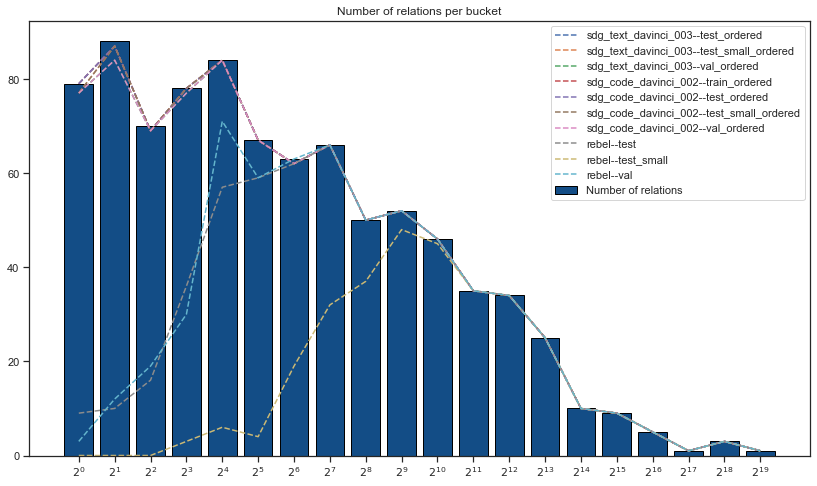

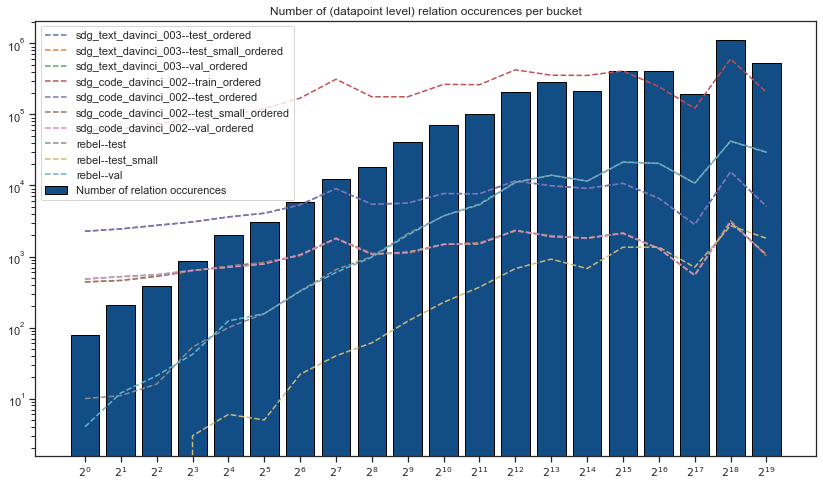

In [5]:
# load rebel dataset
# get bucketting (does not require rebel's targets)
ref_dataset_name = "rebel"
ref_split = "train"
constrained_world = "genie_t5_tokenizeable"
verifications = {
  "compute_frequency_dicts": True,
  "count_datapoints_with_unk_in_target": False,
  "verify_triplet_ordering": False
}
gzipped = True

ref_dataset_parameters = get_dataset_parameters(PRE_COMPUTED_DATA_DIR, ref_dataset_name, ref_split, constrained_world=constrained_world, gzipped=gzipped, **verifications)
ref_dataset = get_dataset(ref_dataset_parameters, tokenizer=tokenizer)
relation_centric_bucketing = evaluation_helpers.RelationCentricBucketing(ref_dataset, base=2)

bucket_idx2num_rels = relation_centric_bucketing.bucket_idx2num_rels
bucket_idx2num_rels = {int(k): v for k, v in bucket_idx2num_rels.items()}
bucket_indices = sorted(list(bucket_idx2num_rels.keys()))

bucket_idx2freq = relation_centric_bucketing.bucket_idx2freq
bucket_idx2freq = {int(k): v for k, v in bucket_idx2freq.items()}

bucket_idx2label = relation_centric_bucketing.bucket_idx2label
bucket_idx2label = {int(k): v for k, v in bucket_idx2label.items()}

bucket_idx2reference_rels_sfs = relation_centric_bucketing.bucket_idx2reference_rels_sfs

plot_data_genie_t5_tokenizeable = get_plot_data(constrained_world)

plot_number_relations(plot_data_genie_t5_tokenizeable, bucket_idx2num_rels, bucket_idx2label, bucket_indices)
plot_number_datapoints(plot_data_genie_t5_tokenizeable, bucket_idx2freq, bucket_idx2label, bucket_indices)

### Concerning the Bucket Plot -- with a `genie` constrained world

INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/train.jsonl.gz: 100%|██████████| 2813210/2813210 [18:11<00:00, 2578.32it/s] 

INFO:src.datamodules.ie_generic:Loaded 2243482 datapoints from ../../data/final_pre_computed/rebel/train.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 527327 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 107 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 42294 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 2243482, 'num_triplets': 5499846, 'num_unique_entities': 1685687, 'num_unique_relations': 872}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [00:02<00:00, 20268.37it/s]

INFO:src.datamodules.ie_generic:Loaded 50065 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 220 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 50065, 'num_triplets': 172041, 'num_unique_entities': 104917, 'num_unique_relations': 878}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 21271.22it/s]

INFO:src.datamodules.ie_generic:Loaded 9954 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 46 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9954, 'num_triplets': 34369, 'num_unique_entities': 27743, 'num_unique_relations': 875}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 25404.63it/s]

INFO:src.datamodules.ie_generic:Loaded 9934 datapoints from ../../data/final_pre_computed/sdg_text_davinci_003/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 66 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 0 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9934, 'num_triplets': 33976, 'num_unique_entities': 27410, 'num_unique_relations': 873}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz: 100%|██████████| 1815378/1815378 [11:25<00:00, 2647.04it/s] 

INFO:src.datamodules.ie_generic:Loaded 1807349 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/train_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 5547 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 2351 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 131 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 1807349, 'num_triplets': 6018637, 'num_unique_entities': 1804644, 'num_unique_relations': 878}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz: 100%|██████████| 50286/50286 [00:02<00:00, 18341.39it/s]

INFO:src.datamodules.ie_generic:Loaded 49961 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 220 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 104 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 1 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 49961, 'num_triplets': 171454, 'num_unique_entities': 104731, 'num_unique_relations': 878}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 16573.93it/s]

INFO:src.datamodules.ie_generic:Loaded 9932 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/test_small_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 46 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 22 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9932, 'num_triplets': 34240, 'num_unique_entities': 27659, 'num_unique_relations': 875}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 16177.23it/s]

INFO:src.datamodules.ie_generic:Loaded 9926 datapoints from ../../data/final_pre_computed/sdg_code_davinci_002/val_ordered.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 66 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 8 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 0 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 9926, 'num_triplets': 33932, 'num_unique_entities': 27382, 'num_unique_relations': 873}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test.jsonl.gz: 100%|██████████| 156449/156449 [00:04<00:00, 36655.55it/s]

INFO:src.datamodules.ie_generic:Loaded 124600 datapoints from ../../data/final_pre_computed/rebel/test.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 29564 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 4 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2281 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 124600, 'num_triplets': 304682, 'num_unique_entities': 166836, 'num_unique_relations': 590}
INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/test_small.jsonl.gz: 100%|██████████| 10000/10000 [00:00<00:00, 10929.53it/s]

INFO:src.datamodules.ie_generic:Loaded 7944 datapoints from ../../data/final_pre_computed/rebel/test_small.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 1906 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 1 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 149 datapoints
INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 7944, 'num_triplets': 19405, 'num_unique_entities': 15679, 'num_unique_relations': 320}


INFO:src.datamodules.ie_generic:Loading the data with: constrained world `genie` -- filter_on_num_tokens `True` -- apply_ordering_heuristic `False`


Loading the data from: ../../data/final_pre_computed/rebel/val.jsonl.gz: 100%|██████████| 155926/155926 [00:04<00:00, 38427.18it/s]

INFO:src.datamodules.ie_generic:Loaded 123941 datapoints from ../../data/final_pre_computed/rebel/val.jsonl.gz
INFO:src.datamodules.ie_generic:[Constrained world filtering] Filtered 29655 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- input] Filtered 11 datapoints
INFO:src.datamodules.ie_generic:[# tokens filtering -- target] Filtered 2319 datapoints


INFO:src.datamodules.ie_generic:Dataset statistics: {'num_datapoints': 123941, 'num_triplets': 303379, 'num_unique_entities': 166211, 'num_unique_relations': 598}


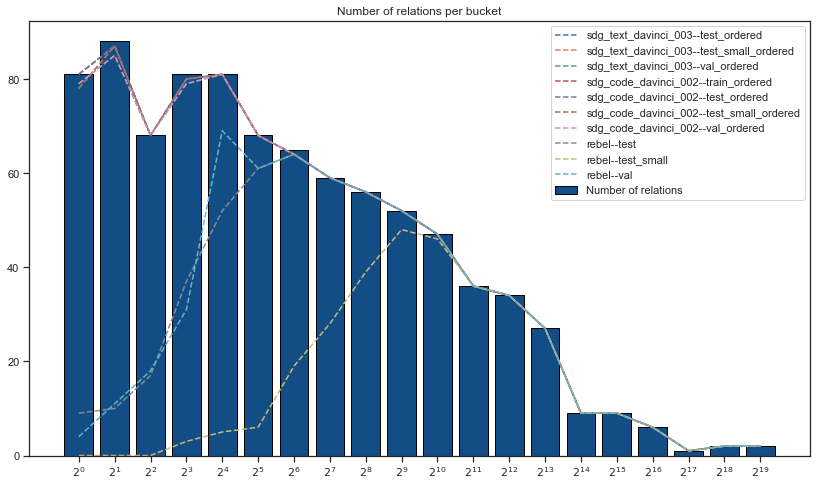

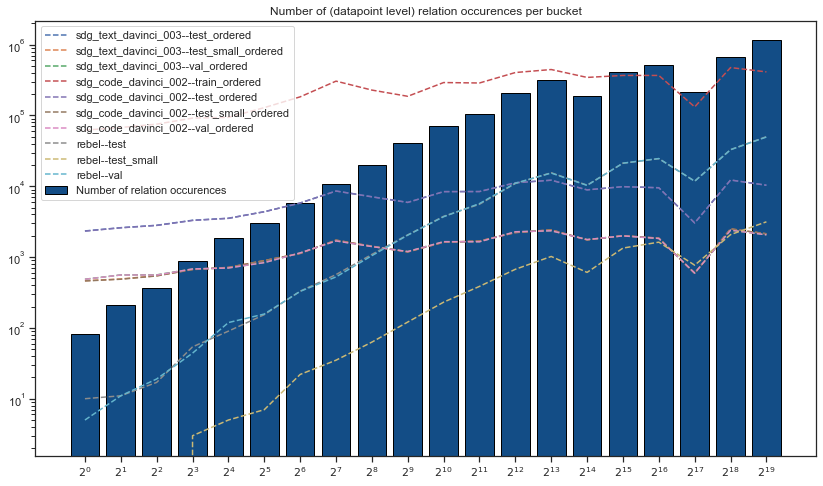

In [9]:
# load rebel dataset
# get bucketting (does not require rebel's targets)
ref_dataset_name = "rebel"
ref_split = "train"
constrained_world = "genie"
verifications = {
  "compute_frequency_dicts": True,
  "count_datapoints_with_unk_in_target": False,
  "verify_triplet_ordering": False
}
gzipped = True

ref_dataset_parameters = get_dataset_parameters(PRE_COMPUTED_DATA_DIR, ref_dataset_name, ref_split, constrained_world=constrained_world, gzipped=gzipped, **verifications)
ref_dataset = get_dataset(ref_dataset_parameters, tokenizer=tokenizer)
relation_centric_bucketing = evaluation_helpers.RelationCentricBucketing(ref_dataset, base=2)

bucket_idx2num_rels = relation_centric_bucketing.bucket_idx2num_rels
bucket_idx2num_rels = {int(k): v for k, v in bucket_idx2num_rels.items()}
bucket_indices = sorted(list(bucket_idx2num_rels.keys()))

bucket_idx2freq = relation_centric_bucketing.bucket_idx2freq
bucket_idx2freq = {int(k): v for k, v in bucket_idx2freq.items()}

bucket_idx2label = relation_centric_bucketing.bucket_idx2label
bucket_idx2label = {int(k): v for k, v in bucket_idx2label.items()}

bucket_idx2reference_rels_sfs = relation_centric_bucketing.bucket_idx2reference_rels_sfs

plot_data_genie = get_plot_data(constrained_world)

plot_number_relations(plot_data_genie, bucket_idx2num_rels, bucket_idx2label, bucket_indices)
plot_number_datapoints(plot_data_genie, bucket_idx2freq, bucket_idx2label, bucket_indices)